In [41]:
import numpy as np
import sys
import os
sys.path.append('../')

from run_pwh_cls import classify_pair, select_k, SpectrumData

In [42]:
def classify(x, k_threshold, power_threshold, heuristics='>'):
    preds = 0
    for sid in x.keys():
        power = x[sid]['power']
        if heuristics == '>':
            if np.sum(power[:k_threshold]) > power_threshold:
                preds += 1
        elif heuristics == '<':
            if np.sum(power[:k_threshold]) < power_threshold:
                preds += 1
    return preds, len(x)
        

def get_roc(x_human, x_model, higher='human'):
    """
    Positive: model-generated
    Negative: human-written
    ROC curve is TPR vs. FPR
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    """
    results = []
    for k in range(1, 51):
        TPR = classify_pair(x_human, x_model, k, higher=higher)
        FPR = 1 - TPR
        results.append((FPR, TPR))
    return sorted(results, key=lambda x: x[1]) 

In [ ]:
def eval_loop(dataset: str):
    """
    dataset: str, 'gpt-4', 'gpt-3.5', or 'gpt-3'
    """
    print(f'Evaluation for {dataset}')
    for genre in ['pubmed']: # , 'writing', 'xsum'
        print(f'Genre: {genre}')
        for est_name in ['gpt2xl']: # , 'mistral', 'bigram'
            human_filename = f'../data/{genre}/{genre}_{dataset}.original.{est_name}.nllzs.fftnorm.txt'
            model_filename = f'../data/{genre}/{genre}_{dataset}.sampled.{est_name}.nllzs.fftnorm.txt'
            if not os.path.exists(human_filename) or not os.path.exists(model_filename):
                continue
            sp_human = SpectrumData(human_filename)
            x_human = sp_human.get_dict()
            sp_model = SpectrumData(model_filename)
            x_model = sp_model.get_dict()

            best_k_1, best_acc_1 = select_k(x_human, x_model, higher='human')
            best_k_2, best_acc_2 = select_k(x_human, x_model, higher='model')
            if best_acc_1 > best_acc_2:
                best_k = best_k_1
                best_acc = best_acc_1
                higher = 'human'
            else:
                best_k = best_k_2
                best_acc = best_acc_2
                higher = 'model'

            roc_results = get_roc(x_human, x_model, higher=higher)

            print(f'   {genre}, {est_name}, best_k={best_k}, best_acc={best_acc:.4f}, higher={higher}')
            print(roc_results)
    print()

In [14]:
eval_loop('gpt-4')

Evaluation for gpt-4
Genre: pubmed
   pubmed, gpt2xl, best_k=3, best_acc=0.9133, higher=model
[(0.6133333333333333, 0.38666666666666666), (0.45333333333333337, 0.5466666666666666), (0.45333333333333337, 0.5466666666666666), (0.44666666666666666, 0.5533333333333333), (0.44666666666666666, 0.5533333333333333), (0.43999999999999995, 0.56), (0.43999999999999995, 0.56), (0.43999999999999995, 0.56), (0.43333333333333335, 0.5666666666666667), (0.43333333333333335, 0.5666666666666667), (0.43333333333333335, 0.5666666666666667), (0.43333333333333335, 0.5666666666666667), (0.43333333333333335, 0.5666666666666667), (0.43333333333333335, 0.5666666666666667), (0.42666666666666664, 0.5733333333333334), (0.42666666666666664, 0.5733333333333334), (0.42666666666666664, 0.5733333333333334), (0.42666666666666664, 0.5733333333333334), (0.42000000000000004, 0.58), (0.42000000000000004, 0.58), (0.42000000000000004, 0.58), (0.4, 0.6), (0.3933333333333333, 0.6066666666666667), (0.3933333333333333, 0.606666666

In [84]:
dataset = 'gpt-4'
# dataset = 'gpt-3.5'
# genre = 'pubmed'
genre = 'xsum'
est_name = 'gpt2xl'

human_filename = f'../data/{genre}/{genre}_{dataset}.original.{est_name}.nllzs.fftnorm.txt'
model_filename = f'../data/{genre}/{genre}_{dataset}.sampled.{est_name}.nllzs.fftnorm.txt'
sp_human = SpectrumData(human_filename)
x_human = sp_human.get_dict()
sp_model = SpectrumData(model_filename)
x_model = sp_model.get_dict()

roc_results = get_roc(x_human, x_model, higher='model')
print(roc_results)

[(0.8733333333333333, 0.12666666666666668), (0.8666666666666667, 0.13333333333333333), (0.8666666666666667, 0.13333333333333333), (0.86, 0.14), (0.86, 0.14), (0.86, 0.14), (0.86, 0.14), (0.86, 0.14), (0.8533333333333333, 0.14666666666666667), (0.8533333333333333, 0.14666666666666667), (0.8533333333333333, 0.14666666666666667), (0.8533333333333333, 0.14666666666666667), (0.8533333333333333, 0.14666666666666667), (0.8466666666666667, 0.15333333333333332), (0.8466666666666667, 0.15333333333333332), (0.8466666666666667, 0.15333333333333332), (0.8466666666666667, 0.15333333333333332), (0.8466666666666667, 0.15333333333333332), (0.8466666666666667, 0.15333333333333332), (0.8466666666666667, 0.15333333333333332), (0.8466666666666667, 0.15333333333333332), (0.84, 0.16), (0.84, 0.16), (0.84, 0.16), (0.84, 0.16), (0.84, 0.16), (0.8333333333333334, 0.16666666666666666), (0.8333333333333334, 0.16666666666666666), (0.8333333333333334, 0.16666666666666666), (0.8333333333333334, 0.16666666666666666),

In [ ]:
# plot roc_results
import matplotlib.pyplot as plt
plt.plot([x[0] for x in roc_results], [x[1] for x in roc_results])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {genre} {est_name} {dataset}')

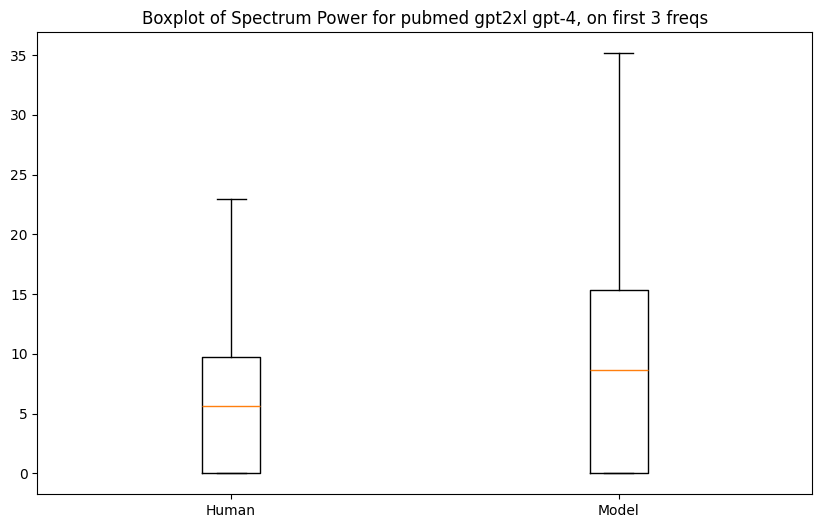

In [40]:
# plot the density curves of spectrum power
k_threshold = 3

# group by sid and select the first k rows 
human_power = sp_human.spectrum_df.groupby('sid').head(k_threshold)['power']
model_power = sp_model.spectrum_df.groupby('sid').head(k_threshold)['power']

# boxplot
plt.figure(figsize=(10, 6))
# plt.violinplot([human_power, model_power])
plt.boxplot([human_power, model_power], tick_labels=['Human', 'Model'])
plt.title(f'Boxplot of Spectrum Power for {genre} {est_name} {dataset}, on first {k_threshold} freqs')
plt.show()

In [ ]:
# Scramble the spectrum and classify
k_threshold = 0
human_power = sp_human.spectrum_df.groupby('sid').head(k_threshold)['power']
model_power = sp_model.spectrum_df.groupby('sid').head(k_threshold)['power']
power_threshold = (human_power.mean() + model_power.mean()) / 2
x_human = sp_human.get_dict()
x_model = sp_model.get_dict()

TP, P = classify(x_model, k_threshold, power_threshold, heuristics='>')
print(f'TP = {TP}, P = {P}')
FP, N = classify(x_human, k_threshold, power_threshold, heuristics='>')
print(f'FP = {FP}, N = {N}')

TP = 0, P = 150
FP = 0, N = 150


In [87]:
TPRs, FPRs = [], []
for k_threshold in range(2, 20):
    human_power = sp_human.spectrum_df.groupby('sid').head(k_threshold)['power']
    model_power = sp_model.spectrum_df.groupby('sid').head(k_threshold)['power']
    power_threshold = (human_power.mean() + model_power.mean()) / 2
    x_human = sp_human.get_dict()
    x_model = sp_model.get_dict()
    TP, P = classify(x_model, k_threshold, power_threshold, heuristics='<')
    TPRs.append(TP / P)
    FP, N = classify(x_human, k_threshold, power_threshold, heuristics='<')
    FPRs.append(FP / N)
# print(TPRs, FPRs)

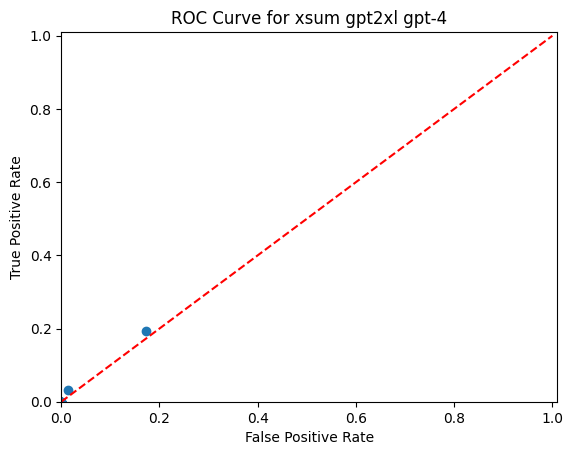

In [88]:
# scatter plot of TPR vs FPR
plt.scatter(FPRs, TPRs)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {genre} {est_name} {dataset}')
plt.xlim(0,1.01)
plt.ylim(0,1.01)
plt.show()